In [ ]:
from data import *
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap,BoundaryNorm
import seaborn as sns


O013257.npz, O013490.npz, O012791.npz have expert labels

In [ ]:


def plot_image(file_name,labeled = True,feature_to_plot ="label",ax=None, standardize = False):
    """
    Plots an image based on the provided feature from a .npz file.
    Parameters:
    file_name (str): The name of the .npz file (without extension) containing the image data.
    labeled (bool, optional): Indicates whether the data includes labels. Default is True.
    feature_to_plot (str, optional): The feature to plot. Options are "label", "DF", "CF", "BF", "AF", "AN", "NDAI", "SD", "CORR". Default is "label".
    ax (matplotlib.axes.Axes, optional): The axes on which to plot the image. Default is None.
    standardize (bool, optional): Indicates whether to standardize the data for certain features. Default is False.
    Returns:
    matplotlib.image.AxesImage: The image object created by imshow.
    
    Example:
    >>> fig, ax = plt.subplots()
    >>> plot_image("example_file", feature_to_plot="NDAI", ax=ax)
    """   
    filepath = "../data/image_data/"
    npz_data = np.load(filepath + file_name+".npz")
    
    img_data = npz_data["arr_0"]
    print(img_data.shape)
    if labeled:
        df_image = pd.DataFrame(img_data,columns = ["y","x","NDAI","SD","CORR","DF","CF","BF","AF","AN","label"])
    else:
        df_image = pd.DataFrame(img_data,columns = ["y","x","NDAI","SD","CORR","DF","CF","BF","AF","AN"])
    if feature_to_plot == "label": 
        plot_df = pd.pivot_table(df_image, index = "y", columns = "x", values = feature_to_plot)
        plot_df.sort_values(by="y",ascending=True,inplace=True)

        colors = ["gray", "black", "white"]  # Define specific colors
        cmap = ListedColormap(colors)
        # Define boundaries for each color (must be one more than the number of colors)
        bounds = [-1, 0, 1, 2]  # -1→notclound->gray, 0→unlabel->black, 1→cloud->white
        norm = BoundaryNorm(bounds, cmap.N)
        # fig, ax = plt.subplots()

        img = ax.imshow(plot_df,cmap=cmap,norm=norm)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
       
        
        
    elif feature_to_plot in ["DF","CF","BF","AF","AN"]:
        plot_df = pd.pivot_table(df_image, index = "y", columns = "x", values = feature_to_plot)
        plot_df.sort_values(by="y",ascending=True,inplace=True)

        if standardize:
            print("Standardizing")
            plot_df = (plot_df - plot_df.mean().mean())/plot_df.std().std()
        
        img = ax.imshow(plot_df,cmap="gray")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    
    elif feature_to_plot in ["NDAI","SD","CORR"]:
        plot_df = pd.pivot_table(df_image, index = "y", columns = "x", values = feature_to_plot)
        plot_df.sort_values(by="y",ascending=True,inplace=True)
        # fig, ax = plt.subplots()
        img = ax.imshow(plot_df)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.colorbar(img,ax=ax, aspect=20,fraction=0.05)
        plt.title(feature_to_plot)
    return img


(115000, 11)
(115032, 11)
(114973, 11)


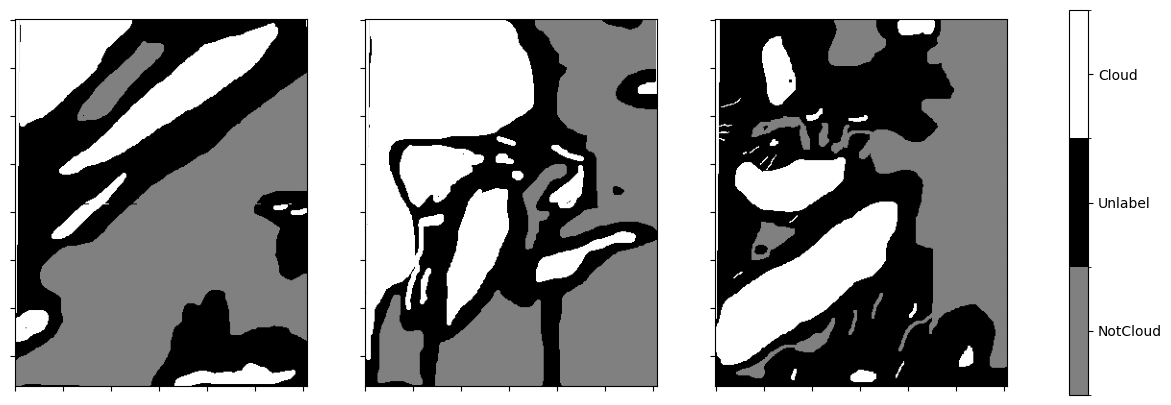

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5)) 

img1 = plot_image("O013257",labeled = True,feature_to_plot ="label",ax=axs[0])
img2 = plot_image("O013490",labeled = True,feature_to_plot ="label",ax=axs[1])
img3  = plot_image("O012791",labeled = True,feature_to_plot ="label",ax=axs[2])

cbar = plt.colorbar(img3, ax = axs, ticks=[-0.5, 0.5, 1.5])  # Tick positions (center of each range)
cbar.set_ticklabels(['NotCloud', 'Unlabel', 'Cloud'])  # Set corresponding labels
plt.show()

(115032, 11)
(115032, 11)
(115032, 11)


Text(0.5, 1.0, 'NDAI')

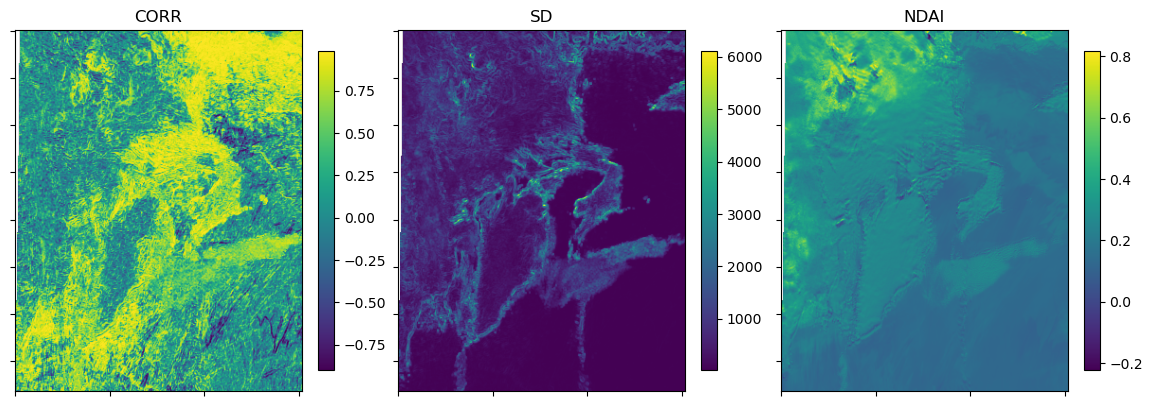

In [72]:
# fig, axs = plt.subplots(1, 1, figsize=(10, 8)) 
fig, axs = plt.subplots(1,3, figsize=(14, 8))
## corr between angles;high cloud free; or low altitude cloud; low--> cloudy
plot_image("O013490",labeled = True,feature_to_plot ="CORR", ax=axs[0]) 
## SD smooth surface; small --> smooth
plot_image("O013490",labeled = True,feature_to_plot ="SD", ax=axs[1])
## NDAI 
plot_image("O013490",labeled = True,feature_to_plot ="NDAI", ax=axs[2])
axs[0].set_title("CORR",)
axs[1].set_title("SD")
axs[2].set_title("NDAI")

plt.title("")

(115032, 11)
(115032, 11)
(115032, 11)
(115032, 11)
(115032, 11)


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

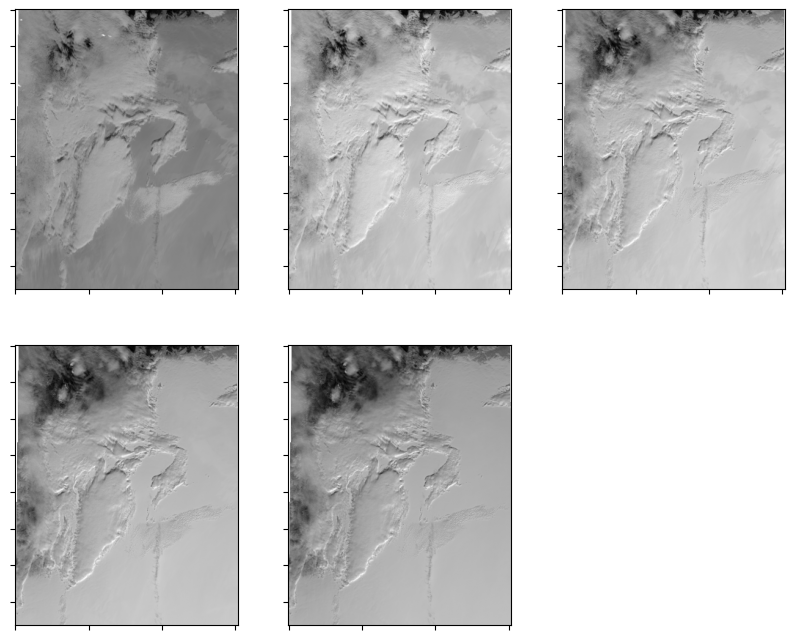

In [143]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8)) 
# label = plot_image("O013257",labeled = True,feature_to_plot ="label",ax=axs[1,2])
DF = plot_image("O013490",labeled = True,feature_to_plot ="DF", ax=axs[0, 0])
CF = plot_image("O013490",labeled = True,feature_to_plot ="CF", ax=axs[0, 1])
BF = plot_image("O013490",labeled = True,feature_to_plot ="BF", ax=axs[0, 2])
AF = plot_image("O013490",labeled = True,feature_to_plot ="AF", ax=axs[1, 0])
AN = plot_image("O013490",labeled = True,feature_to_plot ="AN", ax=axs[1, 1])
axs[1, 2].axis("off")

(114973, 11)
(114973, 11)
(114973, 11)
(114973, 11)
(114973, 11)


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

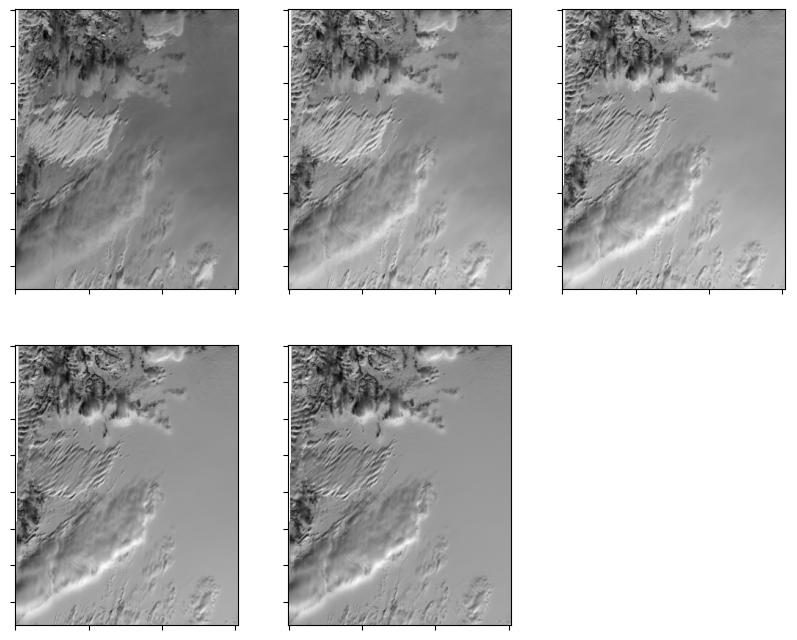

In [144]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8)) 
# label = plot_image("O013257",labeled = True,feature_to_plot ="label",ax=axs[1,2])
DF = plot_image("O012791",labeled = True,feature_to_plot ="DF", ax=axs[0, 0])
CF = plot_image("O012791",labeled = True,feature_to_plot ="CF", ax=axs[0, 1])
BF = plot_image("O012791",labeled = True,feature_to_plot ="BF", ax=axs[0, 2])
AF = plot_image("O012791",labeled = True,feature_to_plot ="AF", ax=axs[1, 0])
AN = plot_image("O012791",labeled = True,feature_to_plot ="AN", ax=axs[1, 1])
axs[1, 2].axis("off")

Quantitative Distribution; Cloud vs no cloud

In [ ]:


def Compare_distribution(file_name,labeled = True,feature_to_plot ="label",ax=None, standardize= True):
    """
    Compare the distribution of a specified feature between cloud and no-cloud data.
    Parameters:
    file_name (str): The name of the .npz file containing the image data.
    labeled (bool, optional): Whether the data includes labels. Default is True.
    feature_to_plot (str, optional): The feature to plot the distribution for. Default is "label".
    ax (matplotlib.axes.Axes, optional): The axes on which to plot the histograms. Default is None.
    standardize (bool, optional): Whether to standardize the feature before plotting. Default is True.
    Returns:
    None: The function plots histograms of the specified feature for cloud and no-cloud data.
    """
    filepath = "../data/image_data/"
    npz_data = np.load(filepath + file_name+".npz")
    
    img_data = npz_data["arr_0"]
    # print(img_data.shape)
    if labeled:
        df_image = pd.DataFrame(img_data,columns = ["y","x","NDAI","SD","CORR","DF","CF","BF","AF","AN","label"])
    else:
        df_image = pd.DataFrame(img_data,columns = ["y","x","NDAI","SD","CORR","DF","CF","BF","AF","AN"])

    # if standardize:
    #     df_image[feature_to_plot] = (df_image[feature_to_plot] - df_image[feature_to_plot].mean())/df_image[feature_to_plot].std()
    
    cloud_df = df_image[df_image["label"]==1]
    nocloud_df = df_image[df_image["label"]==-1]
    na_df = df_image[df_image["label"]==0]

    to_plot_cloud = cloud_df[feature_to_plot]
    to_plot_nocloud = nocloud_df[feature_to_plot]
    if standardize:
        to_plot_cloud = (to_plot_cloud - to_plot_cloud.mean())/to_plot_cloud.std()
        to_plot_nocloud = (to_plot_nocloud - to_plot_nocloud.mean())/to_plot_nocloud.std()

    ax.hist(to_plot_cloud, bins=50, alpha=0.5, label='cloud',density=True)
    ax.hist(to_plot_nocloud, bins=50, alpha=0.5, label='nocloud',density=True)



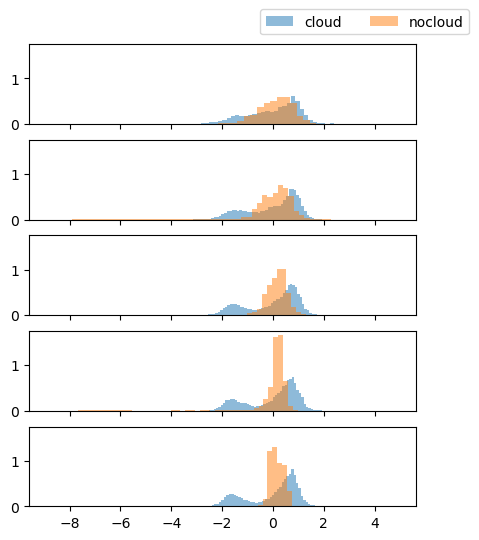

In [291]:
fig, axs = plt.subplots(5, 1, figsize=(5, 6), sharex=True, sharey=True) 
Compare_distribution("O013257",labeled = True,feature_to_plot ="DF",ax=axs[0],standardize=True)
Compare_distribution("O013257",labeled = True,feature_to_plot ="CF",ax=axs[1],standardize=True)
Compare_distribution("O013257",labeled = True,feature_to_plot ="BF",ax=axs[2],standardize=True)
Compare_distribution("O013257",labeled = True,feature_to_plot ="AF",ax=axs[3],standardize=True)
Compare_distribution("O013257",labeled = True,feature_to_plot ="AN",ax=axs[4],standardize=True)

handles, labels = axs[0].get_legend_handles_labels()

# Add shared legend
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.02, 0.95), ncol=2)

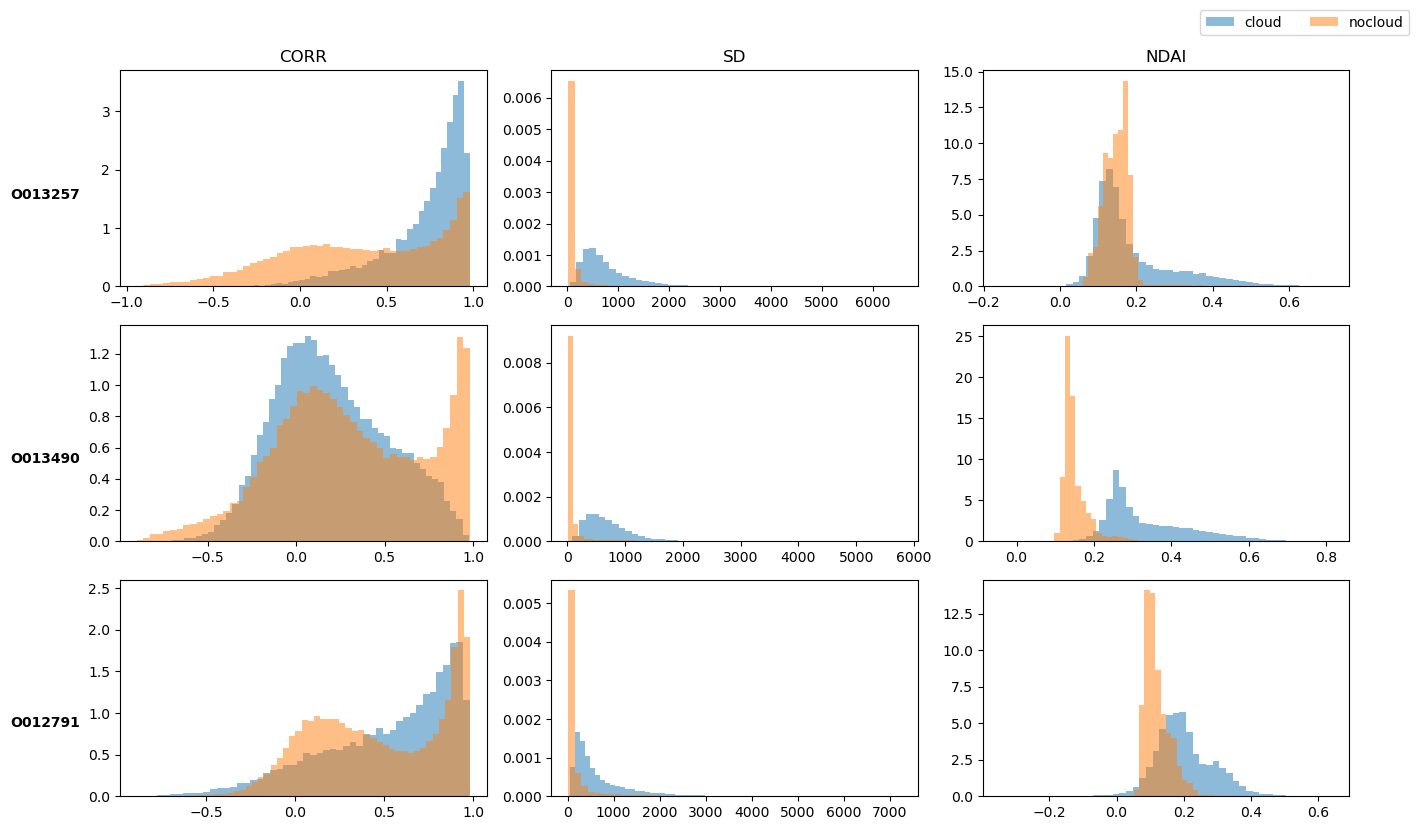

In [104]:
fig, axs = plt.subplots(3, 3, figsize=(13, 8)) 
Compare_distribution("O013257",labeled = True,feature_to_plot ="CORR",ax=axs[0,0],standardize=False)
Compare_distribution("O013490",labeled = True,feature_to_plot ="CORR",ax=axs[1,0],standardize=False)
Compare_distribution("O012791",labeled = True,feature_to_plot ="CORR",ax=axs[2,0],standardize=False)

Compare_distribution("O013257",labeled = True,feature_to_plot ="SD",ax=axs[0,1],standardize=False)
Compare_distribution("O013490",labeled = True,feature_to_plot ="SD",ax=axs[1,1],standardize=False)
Compare_distribution("O012791",labeled = True,feature_to_plot ="SD",ax=axs[2,1],standardize=False)


Compare_distribution("O013257",labeled = True,feature_to_plot ="NDAI",ax=axs[0,2],standardize=False)
Compare_distribution("O013490",labeled = True,feature_to_plot ="NDAI",ax=axs[1,2],standardize=False)
Compare_distribution("O012791",labeled = True,feature_to_plot ="NDAI",ax=axs[2,2],standardize=False)

handles, labels = axs[0,1].get_legend_handles_labels()

# Add shared legend
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.04, 1.04), ncol=2)

axs[0,0].set_title("CORR",)
axs[0,1].set_title("SD")
axs[0,2].set_title("NDAI")
row_labels = ["O013257","O013490","O012791"]
for i, label in enumerate(row_labels):  
    fig.text(-0.015, .8 - (i * 0.33), label, ha='center', va='center',fontweight='bold')
# fig.text(-0.05, 0.85 - (i * 0.4), label, ha='center', va='center')
plt.tight_layout()
plt.show()


O012791.npz
0
O013257.npz
1
O013490.npz
2


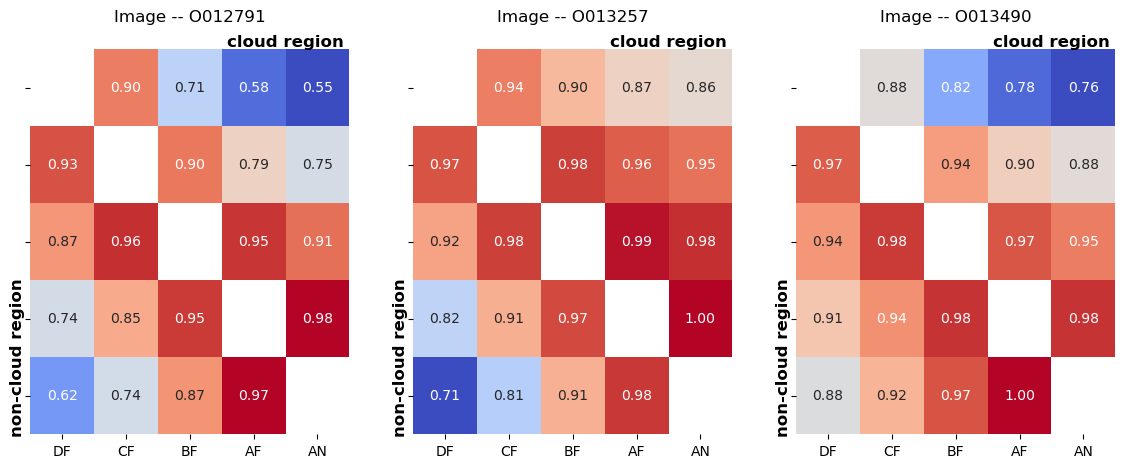

In [54]:
## upper half is cloud, lower half is non-cloud
fig,axs = plt.subplots(1,3, figsize=(14, 5))
for idx, (key,mtx) in enumerate(corr_matrix.items()):
    print(key)
    print(idx)
    np.fill_diagonal(mtx.values, np.nan)
    mtx.columns = ["DF","CF","BF","AF","AN"]

    sns.heatmap(mtx, annot=True, cmap='coolwarm', fmt=".2f",cbar=False, ax=axs[idx])
    axs[idx].set_yticklabels([])
    axs[idx].text(-0.2, 4, "non-cloud region", va='center', ha='center', rotation=90, fontsize=12, fontweight='bold')
    axs[idx].text(4, -0.1, "cloud region", va='center', ha='center', rotation=0, fontsize=12, fontweight='bold')
    axs[idx].set_title("Image -- "+ key.split(".")[0],pad=20)
    # plt.legend().set_visible(False)
plt.show()

check missing values for non-label images 

In [3]:
import glob

In [ ]:
filepath = "../data/image_data/"


corr_matrix = {}

for file in glob.glob(filepath + "*.npz"):
    
    
    
    npz_data = np.load(file)
    img_data = npz_data["arr_0"]
    

    if img_data.shape[1]>10:
        df_image = pd.DataFrame(img_data,columns = ["y","x","NDAI","SD","CORR","DF","CF","BF","AF","AN","label"])
        #for labeled data, we want to compute correlation between angles 
        cloud_corr = df_image[df_image["label"]==1][["DF","CF","BF","AF","AN"]].corr()
        noncloud_corr= df_image[df_image["label"]==-1][["DF","CF","BF","AF","AN"]].corr()
        print("cloud ", cloud_corr)
        print("noncloud ", noncloud_corr)
        ## make a correlation matrix combining the two matrices together
        cloud_corr_up = np.triu(np.array(cloud_corr))
        noncloud_corr_down = np.tril(np.array(noncloud_corr),k=-1)
        corr_matrix[file.split("/")[-1]] = pd.DataFrame(np.where(cloud_corr_up!=0,cloud_corr_up,noncloud_corr_down))
        
    else:
        df_image = pd.DataFrame(img_data,columns = ["y","x","NDAI","SD","CORR","DF","CF","BF","AF","AN"])
    
    

    #check NA's 
    na_atall = df_image.isna().sum().sum()
    
    if na_atall>0:
        print(file.split("/")[-1])
        print("Sum of NA value :", na_atall)
        print("NA value in each feature")
        print(df_image.isna().sum())    
    # print(df_image )
    # #check distribution of each feature
    # print("NDAI: ", df_image["NDAI"].mean()," ", df_image["NDAI"].std()," ", df_image["NDAI"].max()," ", df_image["NDAI"].min())
    # print("SD: ", df_image["SD"].mean()," ", df_image["SD"].std()," ", df_image["SD"].max()," ", df_image["SD"].min())
    # print("CORR: ", df_image["CORR"].mean()," ", df_image["CORR"].std()," ", df_image["CORR"].max()," ", df_image["CORR"].min())
    
    ## visualize the images
    # image_name = file.split("/")[-1].split(".")[0]
    # fig, axs = plt.subplots(2, 3, figsize=(10, 8)) 
    # # label = plot_image("O013257",labeled = True,feature_to_plot ="label",ax=axs[1,2])
    # DF = plot_image(image_name,labeled = False,feature_to_plot ="DF", ax=axs[0, 0],standardize = False)
    # CF = plot_image(image_name,labeled = False,feature_to_plot ="CF", ax=axs[0, 1],standardize = False)
    # BF = plot_image(image_name,labeled = False,feature_to_plot ="BF", ax=axs[0, 2],standardize = False)
    # AF = plot_image(image_name,labeled = False,feature_to_plot ="AF", ax=axs[1, 0],standardize = False)
    # AN = plot_image(image_name,labeled = False,feature_to_plot ="AN", ax=axs[1, 1],standardize = False)
    # axs[1, 2].axis("off")
    # plt.show()

    ## Append stats for each image to detect outliers??

    
    # print(img_data.shape)

cloud            DF        CF        BF        AF        AN
DF  1.000000  0.895851  0.712871  0.578990  0.545560
CF  0.895851  1.000000  0.900277  0.791140  0.748214
BF  0.712871  0.900277  1.000000  0.952516  0.907283
AF  0.578990  0.791140  0.952516  1.000000  0.975025
AN  0.545560  0.748214  0.907283  0.975025  1.000000
noncloud            DF        CF        BF        AF        AN
DF  1.000000  0.932471  0.870463  0.743880  0.623683
CF  0.932471  1.000000  0.956119  0.848293  0.743483
BF  0.870463  0.956119  1.000000  0.948564  0.872977
AF  0.743880  0.848293  0.948564  1.000000  0.974320
AN  0.623683  0.743483  0.872977  0.974320  1.000000
cloud            DF        CF        BF        AF        AN
DF  1.000000  0.940080  0.897662  0.871466  0.859710
CF  0.940080  1.000000  0.975928  0.959113  0.948465
BF  0.897662  0.975928  1.000000  0.991024  0.982733
AF  0.871466  0.959113  0.991024  1.000000  0.995318
AN  0.859710  0.948465  0.982733  0.995318  1.000000
noncloud            DF